# Hypothesis 2
### The number of negative reviews will fluctuate respective to the economy.
##### During times of economic hardship, money is less-freely able to be spent, so bad experiences will be seen as a greater waste than during economic prosperity.

We're going to plot the numbers of bad (and good) reviews per date from a specific location in the Yelp dataset, and from this we will again try to visualize economic change. All frequencies will be normalized against the number of reviews per day and converted to a percentage.

In [1]:
import pandas as pd
import numpy as np
import collections
import pickle, os
from matplotlib.dates import date2num
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# change this path to your own.
path = "E:/yelp/"

We're going to steal code from 'Hypothesis 1' and put it here to be used.

In [3]:
def plot_city_stats(times, other_axis, redo_x=False, redo_y=False):
    """
    This allows you to plot our dates and normalized counts with a particular x and y axis.
    
    Args:
        times ([datetime.datetime]): the datetimes where reviews are present for a given location
        other_axis ([float]): the review_counts for the datetimes normalized by number of new users on that date
        redo_x ([datetime], optional): two datetimes representing the start and end dates to view on the graph; defaults to False.
        redo_y ([float], optional): two floats representing the upper and lower bounds of the normalized reviews to be viewed on the graph; defaults to False.
    
    """
    
    plottable_dates = date2num([datetime.strptime(i, '%Y-%m-%d') for i in times])
    
    plt.figure(figsize=(20,10))
    plt.plot_date(plottable_dates, other_axis)
    
    if redo_x:
        plt.xlim(redo_x[0], redo_x[1])
    
    if redo_y:
        plt.ylim(redo_y[0], redo_y[1])
    
    #plt.title("{} for {}".format(stats, city))
    #plt.plot(times, np.poly1d(np.polyfit(times, other_axis, 1)))
    plt.show()

A different normalizeLocation function will be necessary for this task, as we are not measuring the same things as we did in Hypothesis 1.

In [4]:
def normalizeLocation(state, path, cities_or_states="States"):
    """
    Given a state (or city if you really want to go that route), find the dates of the reviews and the normalized counts per date.
    
    Args:
        state (str): represents the state code or city_state combo
        path (str): the location where all the files for this project can be found
        cities_or_states (str, optional): either "States" or "Cities" and reflects which directory data is being found in
        
    Returns:
        [datetime.datetime]: the dates where reviews for a given location are taken from
        [float]: review counts normalized given new user counts for each date in the datetime
    
    """
    
    reviews = pd.read_pickle(os.path.join(path, cities_or_states, "{}.pkl".format(state)))

    review_dates = reviews.sort_values('date')['date'].unique().tolist()  # first part to return
    overall_sorted_reviews = reviews.sort_values('date').groupby(['date'], as_index=False).count()
    overall_review_counts = overall_sorted_reviews['review_id'].tolist()
    
    star_tallies = []
    for i in range(1, 6):
        non_i = [j for j in range(1,6) if j != i]
        
        i_reviews = reviews.copy(deep=True)
        i_reviews['stars'] = i_reviews['stars'].replace(to_replace=non_i, value=[0,0,0,0])
        sorted_reviews = i_reviews.sort_values('date').groupby(['date'], as_index=False).sum()
        review_counts = sorted_reviews['stars'].tolist()
        star_tallies.append(review_counts)
    
    normalized_star_tallies = []
    for tally in star_tallies:
        normalized_star_tallies.append([r / u for r,u in zip(tally, overall_review_counts)])  # second part to return
    
    return review_dates, normalized_star_tallies

Now we can plot each of the stars' values against the dates to see how they change over time.

In [5]:
ON_review_dates, ON_tallies = normalizeLocation("ON", path)

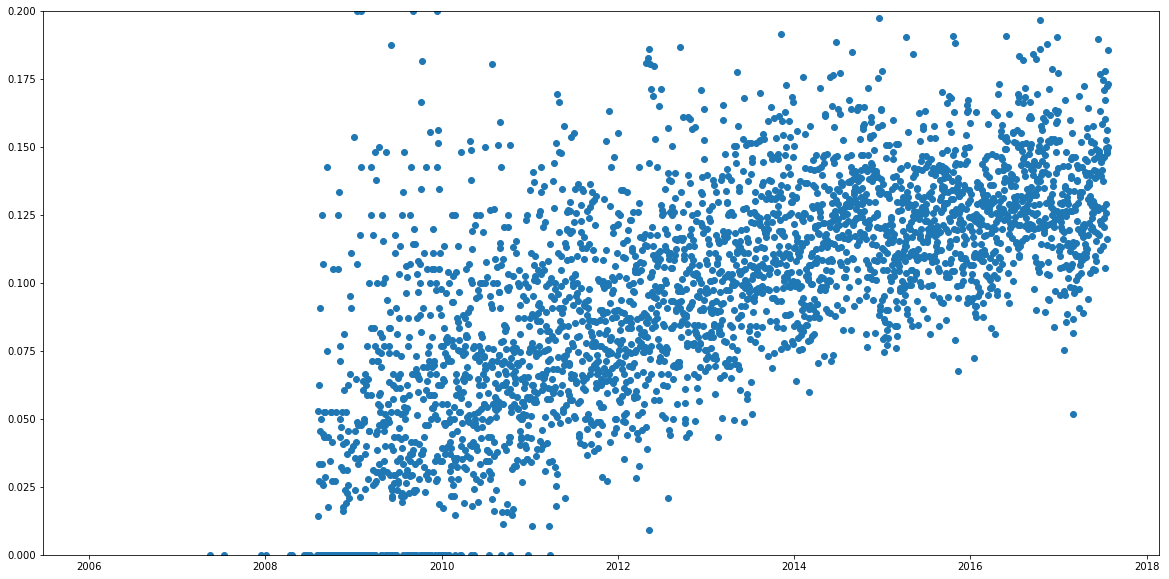

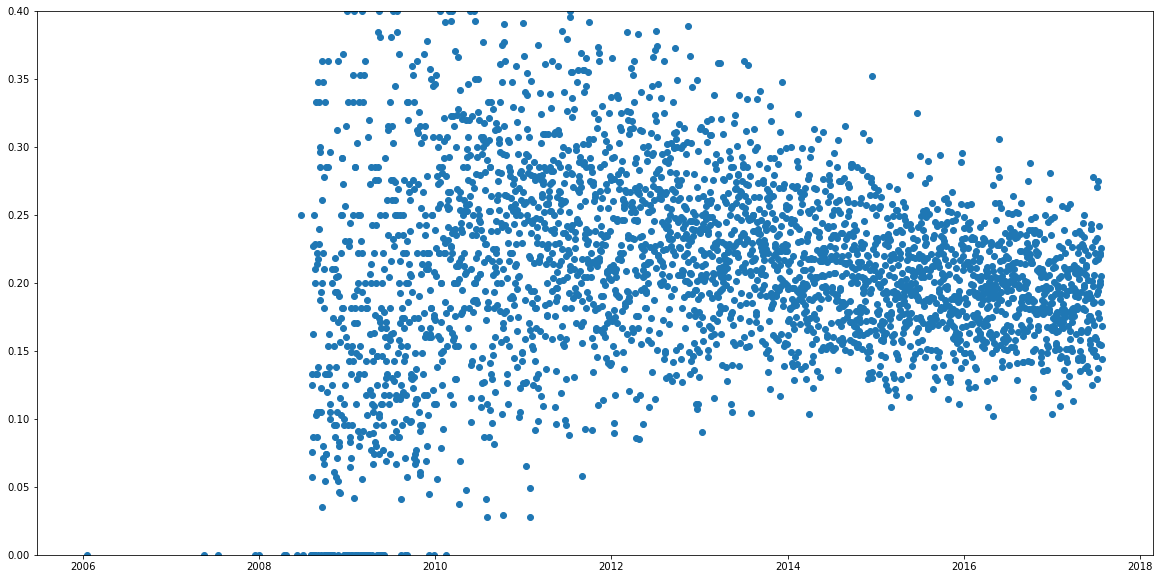

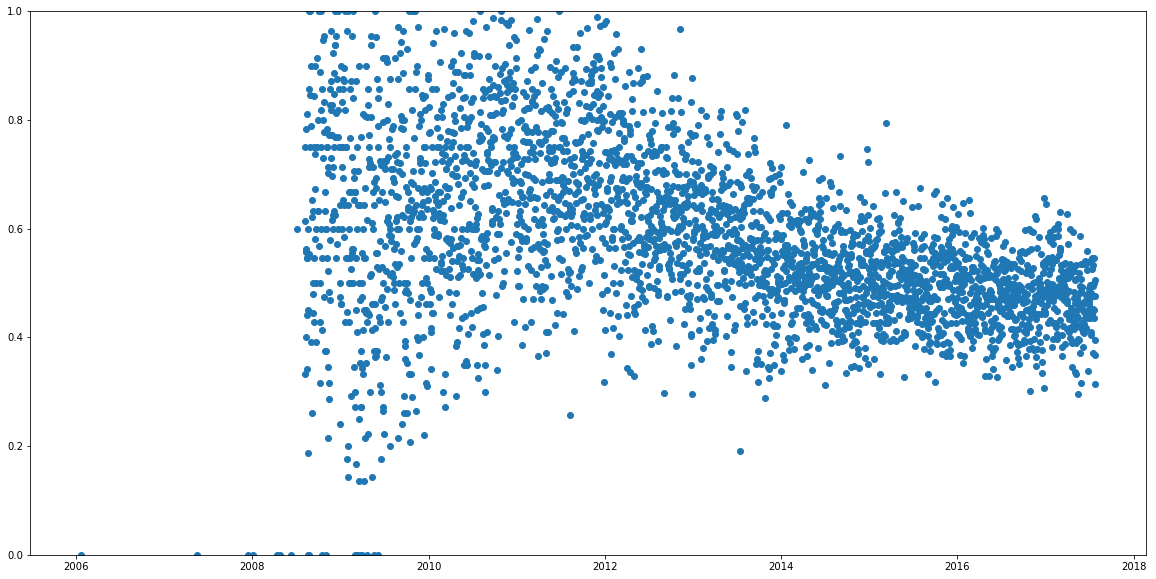

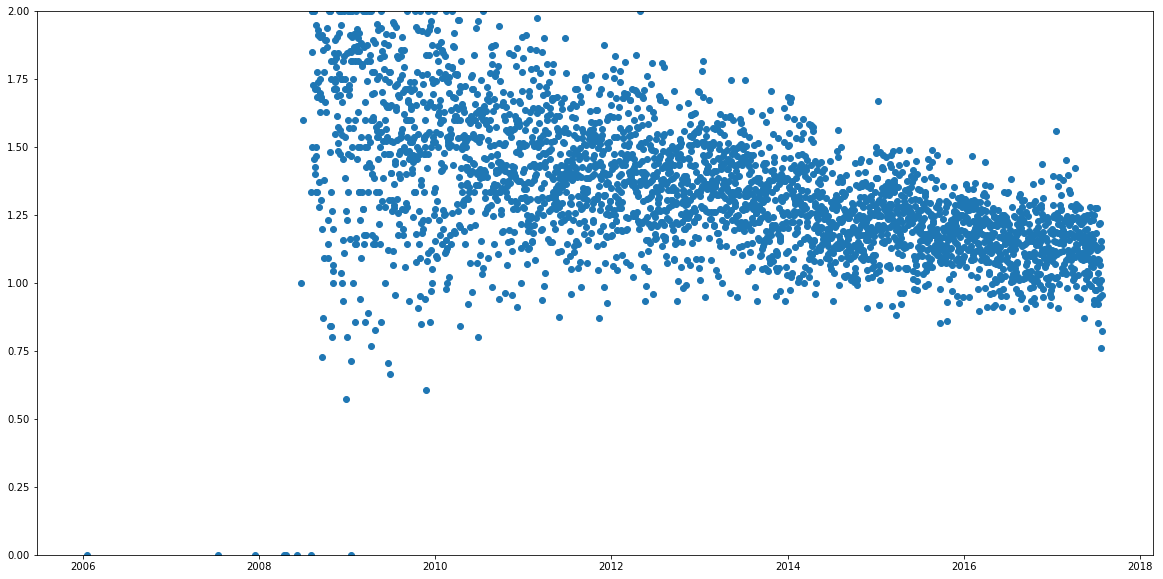

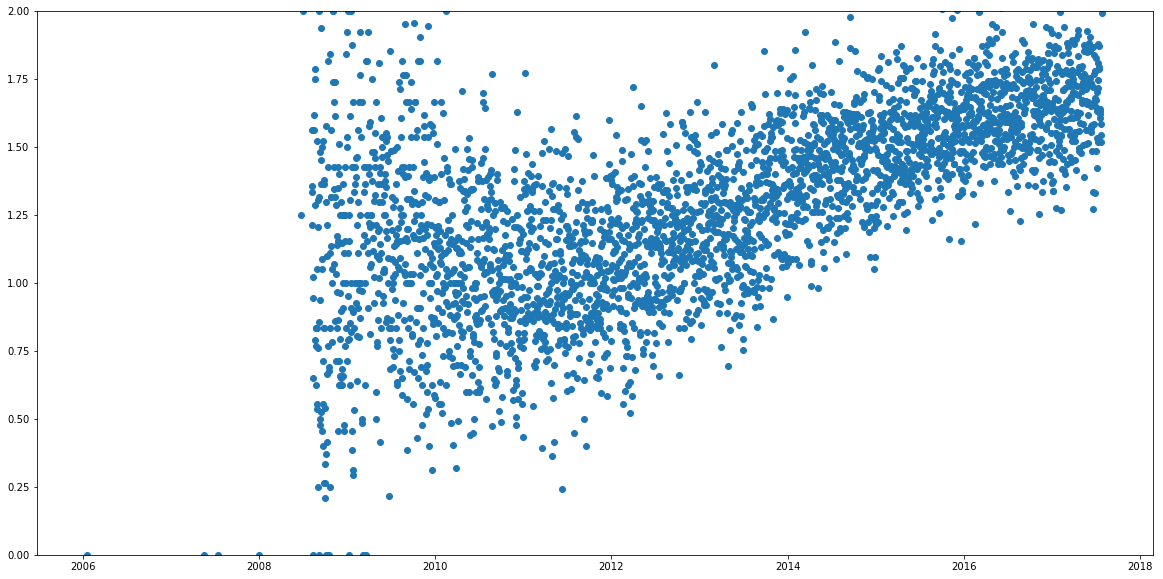

In [13]:
plot_city_stats(ON_review_dates, ON_tallies[0],
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0, 0.2]
               )

plot_city_stats(ON_review_dates, ON_tallies[1],
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0, 0.4]
               )

plot_city_stats(ON_review_dates, ON_tallies[2],
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0, 1]
               )

plot_city_stats(ON_review_dates, ON_tallies[3],
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0, 2]
               )

plot_city_stats(ON_review_dates, ON_tallies[4],
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0, 2]
               )

In the graphs above, the number of each star rating (from 1 to 5) is plotted respectively.

In [7]:
NV_review_dates, NV_tallies = normalizeLocation("NV", path)

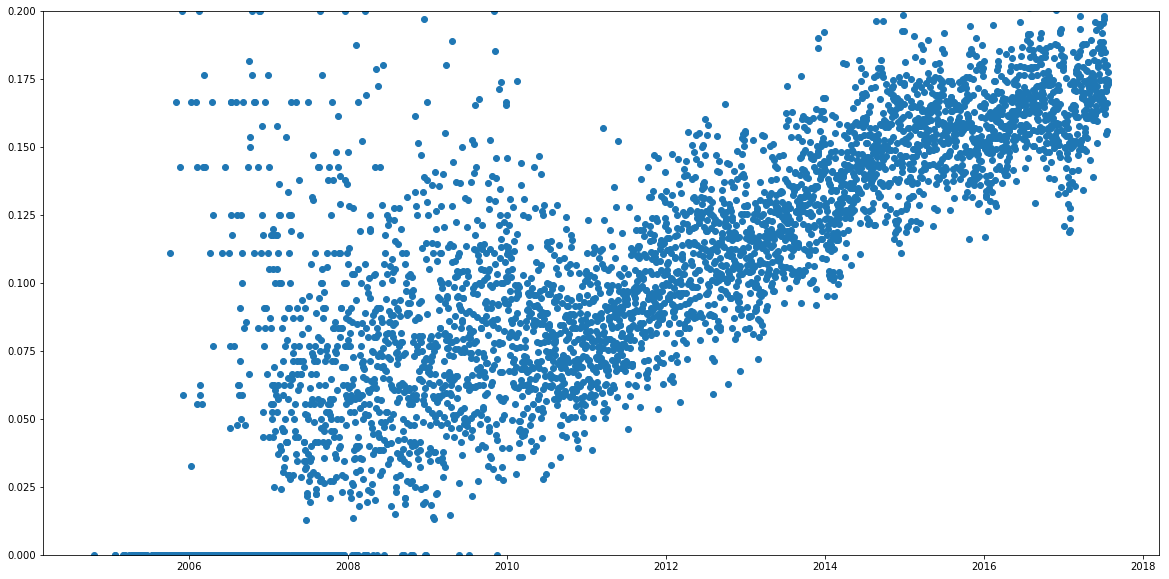

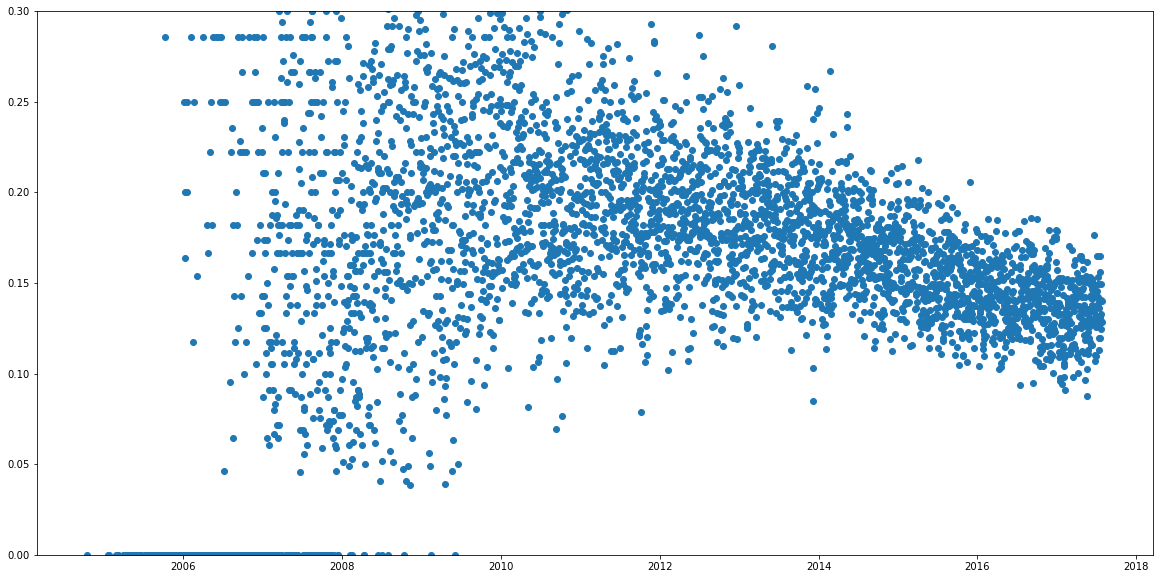

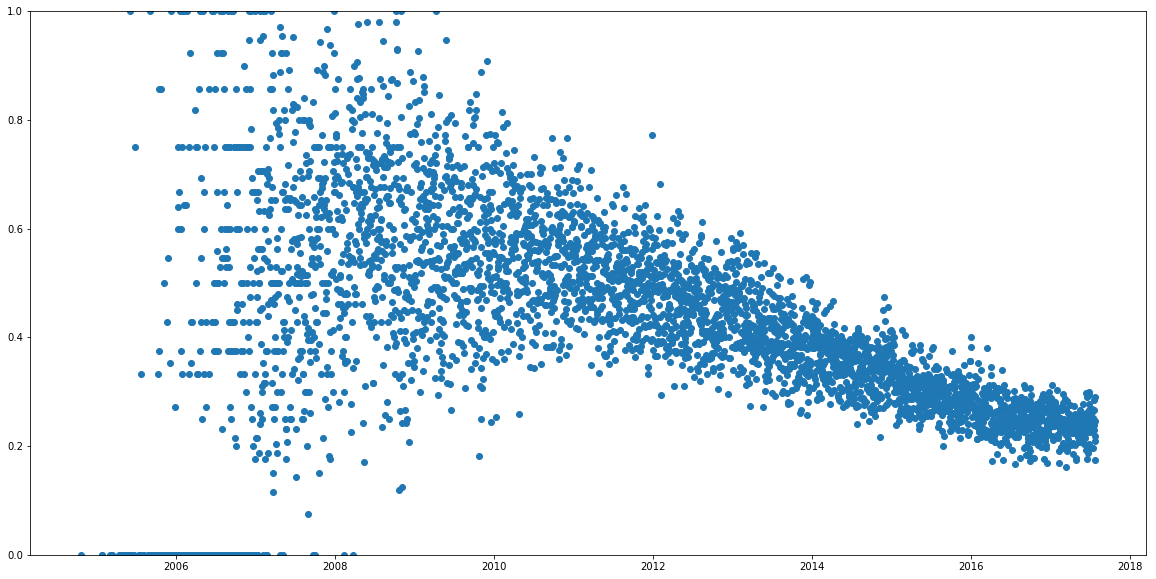

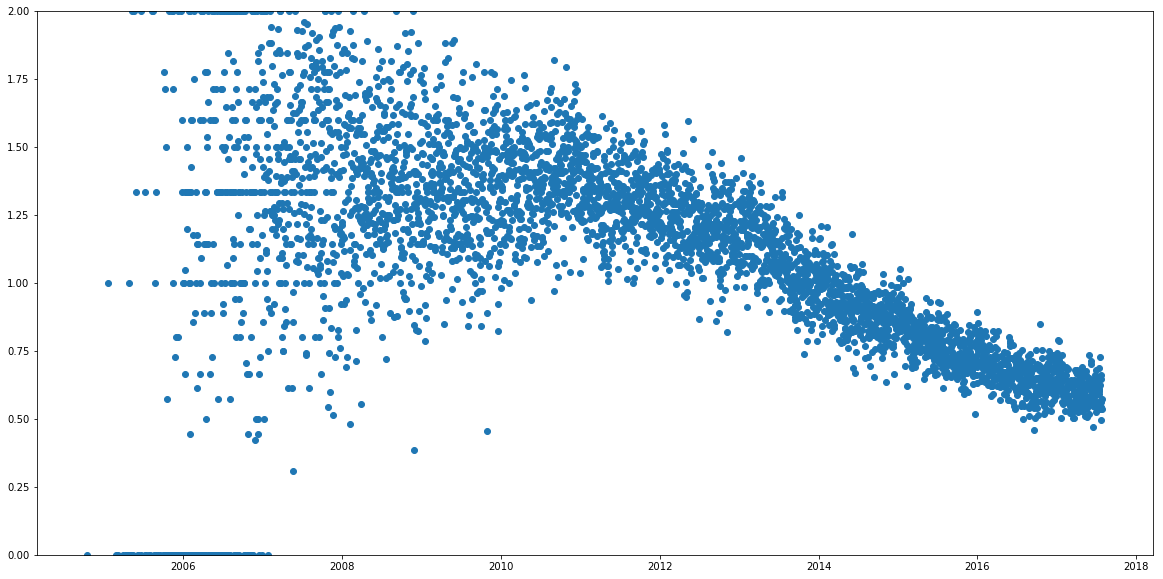

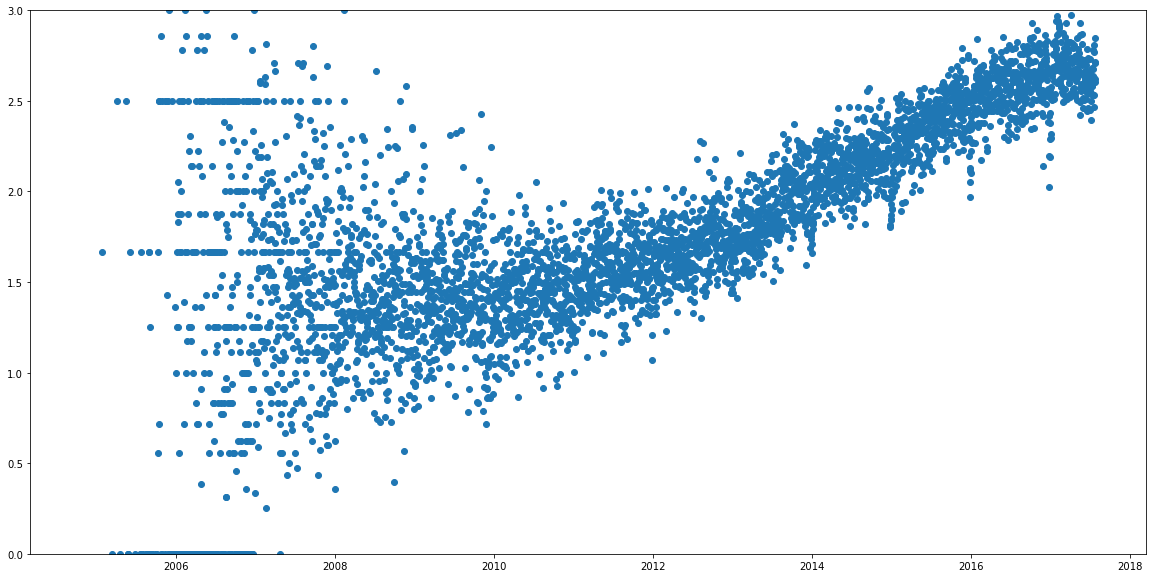

In [18]:
plot_city_stats(NV_review_dates, NV_tallies[0],
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0, 0.2]
               )

plot_city_stats(NV_review_dates, NV_tallies[1],
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0, 0.3]
               )

plot_city_stats(NV_review_dates, NV_tallies[2],
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0, 1]
               )

plot_city_stats(NV_review_dates, NV_tallies[3],
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0, 2]
               )

plot_city_stats(NV_review_dates, NV_tallies[4],
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0, 3]
               )

In [19]:
EDH_review_dates, EDH_tallies = normalizeLocation("EDH", path)

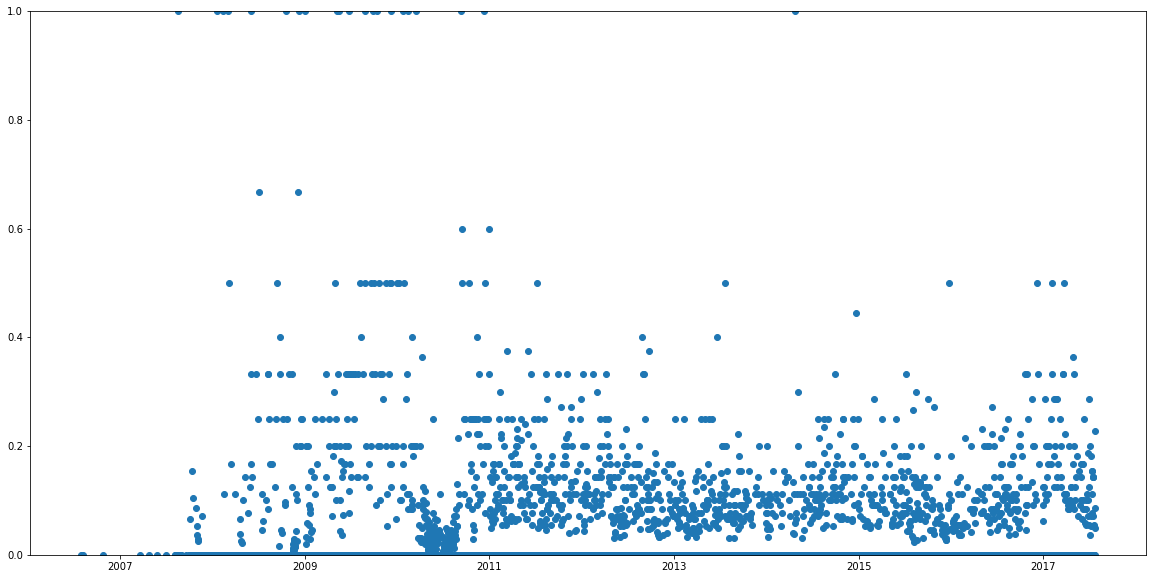

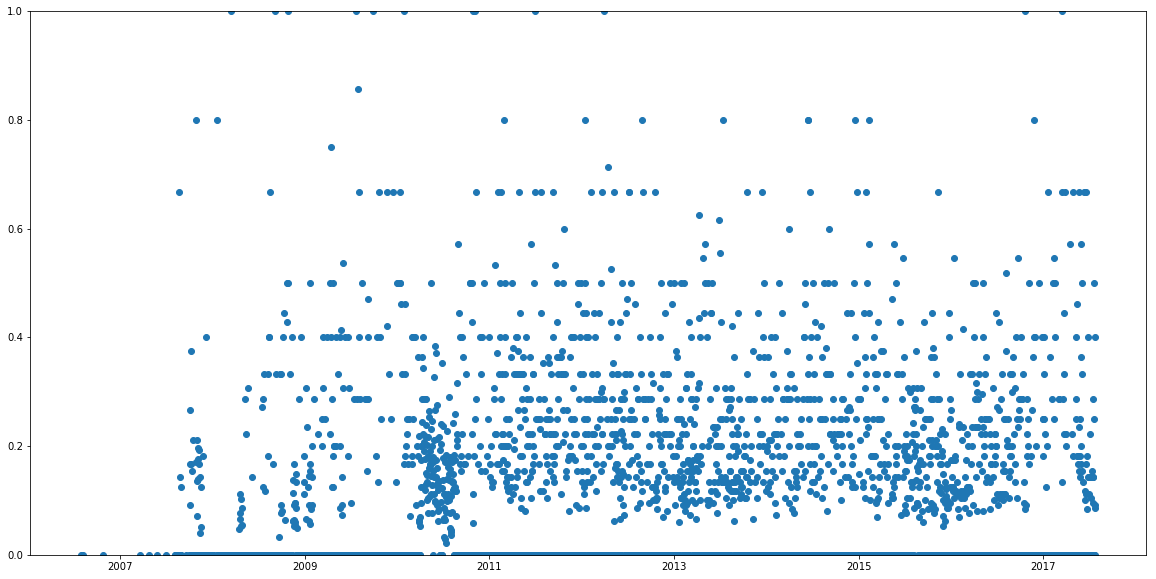

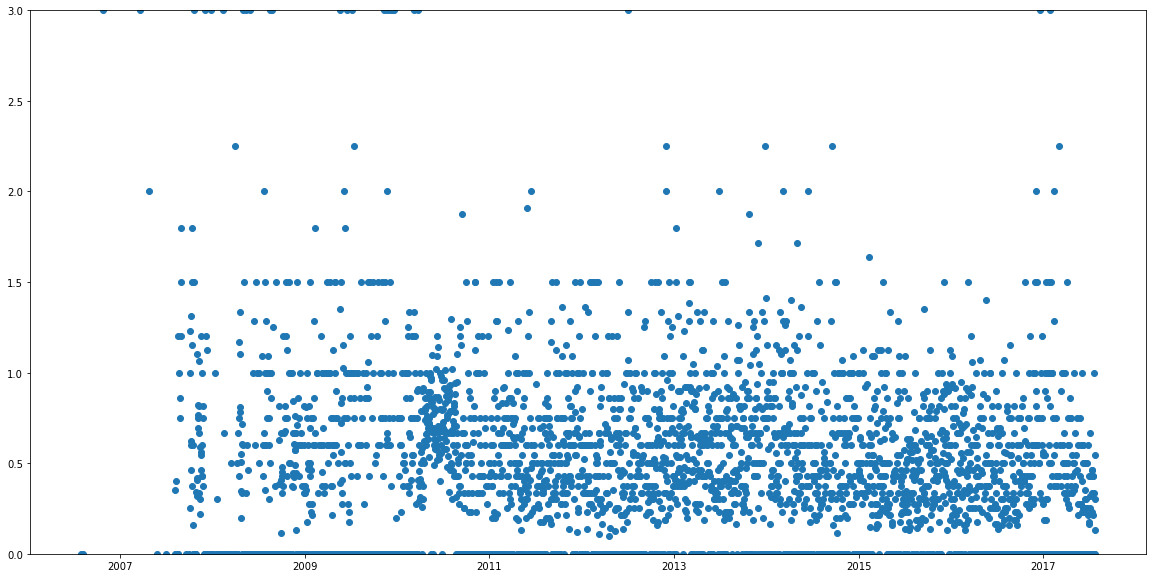

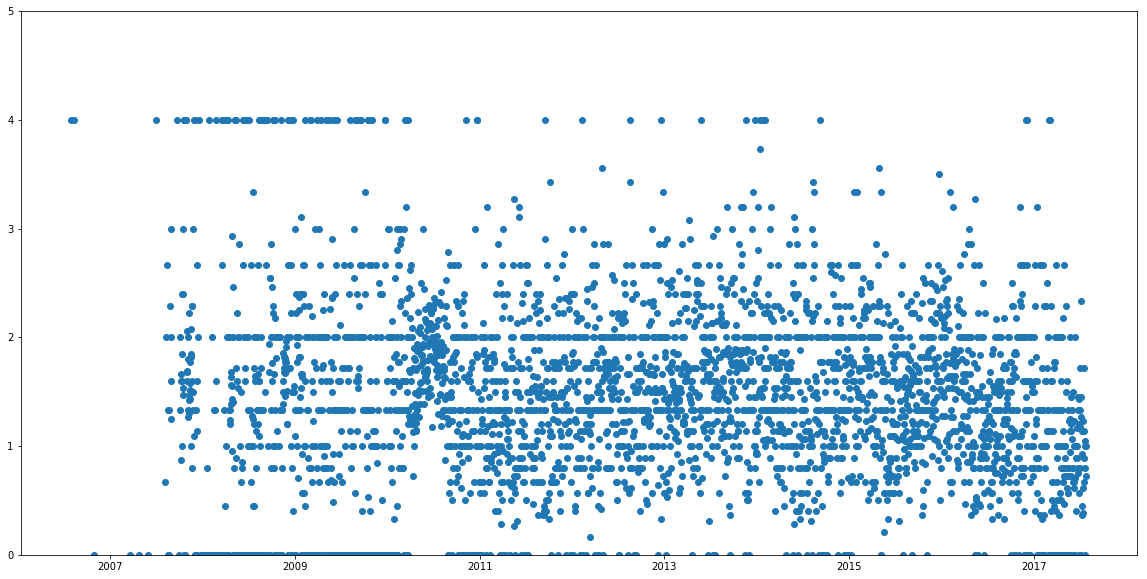

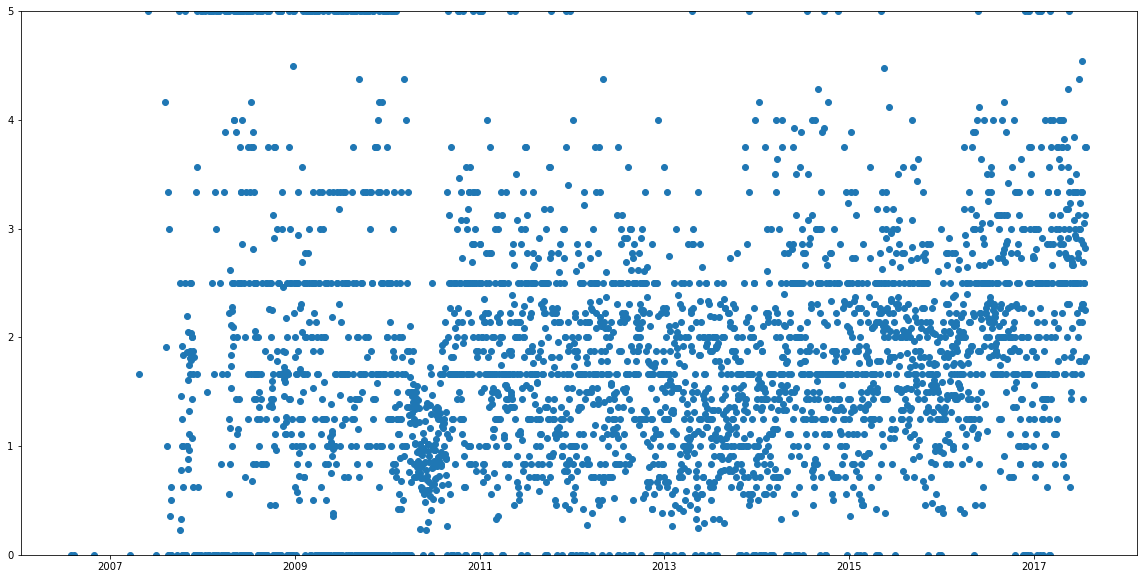

In [23]:
plot_city_stats(EDH_review_dates, EDH_tallies[0],
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0, 1]
               )

plot_city_stats(EDH_review_dates, EDH_tallies[1],
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0, 1]
               )

plot_city_stats(EDH_review_dates, EDH_tallies[2],
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0, 3]
               )

plot_city_stats(EDH_review_dates, EDH_tallies[3],
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0, 5]
               )

plot_city_stats(EDH_review_dates, EDH_tallies[4],
                #redo_x=[datetime(year=2008, month=1, day=1), datetime(year=2018, month=1, day=1)],
                redo_y=[0, 5]
               )